# Assignment

In the lecture, we focused our discussion of recommender systems on **collaborative filtering**. In this assignment, we focus on **content-based recommenders** instead. Content-based recommenders have two main drawbacks: (1) they require meta-data about the items, and (2) they ignore user-item interactions (to see what a user might like, we don't look at what other similar users seem to like). However, content-based recommenders are still useful and in many production scenarios, and with some added effort we can even incorporate some ideas of collaborative filtering, such as focusing on less popular recommendation. Often in production, content-based recommenders are used alongside collaborative filtering to create a hybrid model.

Foretunately, compared to collaborative filtering, content-based recommenders are more straightforward to implement and easier to understand. 

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The data we use in this assignment is a movie meta-data that accompanies the user-movie rating data we used in the lecture. Let's take a look:

In [2]:
df_movies = pd.read_csv('movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


As we can see, the `genres` column is not in the right format for us to do comparisons. So we begin by creating a dummy column for each genre. Programming such a thing would not be very easy, but foretunately, we can use the `str.get_dummies` method to do this.

In [3]:
# df_movies['genres'].str.split('|', expand = True).head()
df_movies = pd.concat([df_movies.drop(columns = 'genres'), df_movies['genres'].str.get_dummies()], axis = 1)
df_movies.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


It is now time to build our recommender system. To illustrate how it works, we pick the movie `Toy Story (1995)` as the reference movie. In other words, we assume that someone just watched this movie, and we want to propose a few new movies to watch.

Finding "Toy Story" MovieID

In [4]:
movie_chosen = df_movies.loc[df_movies['title'] == 'Toy Story (1995)', :]

In [5]:
movie_chosen

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
movie_chosen = df_movies.loc[df_movies['title'] == 'Toy Story (1995)', :].drop(columns = ['movieId', 'title']).transpose()[0]
movie_chosen

(no genres listed)    0
Action                0
Adventure             1
Animation             1
Children              1
Comedy                1
Crime                 0
Documentary           0
Drama                 0
Fantasy               1
Film-Noir             0
Horror                0
IMAX                  0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Thriller              0
War                   0
Western               0
Name: 0, dtype: int64

Before we start, let's create a new `DataFrame` that will store the similarity scores. Once we calculate the similarities between `Toy Story (1995)` and all the other movies in the data, we will store the similarity scores as a new column in the data below.

In [7]:
df_sim = df_movies[['movieId', 'title']].copy()
df_sim.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


- Find all the movies similar to the above movie. The easiest way to do this is by using the `pd.DataFrame.corrwith` method. You can pass `movie_chosen` to this method and specify the correct value for `axis`. The default similarity metric used is Pearson's correlation, so add a new column to the `df_sim` data called `sim_pearson` to store the similarity scores. Show the top 5 rows of the resulting data. <span style="color:red" float:right>[2 point]</span>

In [8]:
## your code goes here

## your code goes here
df_sim['sim_pearson']=df_movies.corrwith(movie_chosen, axis=1)

In [9]:
df_sim.head()

,movieId,title,sim_pearson
0,1,Toy Story (1995),1.000000
1,2,Jumanji (1995),0.727607
2,3,Grumpier Old Men (1995),0.192450
3,4,Waiting to Exhale (1995),0.080845
4,5,Father of the Bride Part II (1995),0.397360


In [10]:
df_movies.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Pearson's correlation may not be the best similarity metric to use with the data we have, so try [Jaccard similarity](https://en.wikipedia.org/wiki/Jaccard_index) instead. To specify another similarity function, we can use the `method` argument of `corrwith`. Unforetunately, Jaccard similarity is not one of the default metrics offered, but `method` also accepts functions (referred to as a "callable" in the doc).

- Use `corrwith` to find the similarity between `Toy Story (1995)` and other movies, using Jaccard similarity. Add the similarity scores to `df_sim` as a new column calld `sim_jaccard` and show the top 5 rows. <span style="color:red" float:right>[2 point]</span>

In [11]:
from sklearn.metrics import jaccard_score

## your code goes here


In [12]:
df_sim['sim_jaccard'] = df_movies.corrwith(movie_chosen, method=jaccard_score, axis=1)

In [13]:
df_sim.head()

,movieId,title,sim_pearson,sim_jaccard
0,1,Toy Story (1995),1.000000,1.000000
1,2,Jumanji (1995),0.727607,0.600000
2,3,Grumpier Old Men (1995),0.192450,0.166667
3,4,Waiting to Exhale (1995),0.080845,0.142857
4,5,Father of the Bride Part II (1995),0.397360,0.200000


- Use `corrwith` to find the similarity between `Toy Story (1995)` and other movies, but this time use cosine similarity. Add the similarity scores to `df_sim` as a new column calld `sim_cosine` and show the top 5 rows. <span style="color:red" float:right>[5 point]</span>

HINT: The `method` argument accepts any function of two inputs (two vectors of the same size) and return a single output, namely the similarity score. This worked with Jaccard similarity above, but the `cosine_similarity` function we load below works differently (check its documentation) and we can't pass it directly to `corrwith`. Instead, we need to write a modified version of it that has the expected behavior described above. The easiest way to do this is using the `lambda` notation. If you're not familiar with it read about it [here](https://www.w3schools.com/python/python_lambda.asp). You can also do this by simply defining a new function.

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

## your code goes here
df_sim['sim_cosine']=df_movies.corrwith(movie_chosen, axis=1, method=lambda x, y:cosine_similarity(x.reshape(1,-1), y.reshape(1,-1)))

In [15]:
df_sim.head()


,movieId,title,sim_pearson,sim_jaccard,sim_cosine
0,1,Toy Story (1995),1.000000,1.000000,[[1.0]]
1,2,Jumanji (1995),0.727607,0.600000,[[0.7745966692414834]]
2,3,Grumpier Old Men (1995),0.192450,0.166667,[[0.3162277660168379]]
3,4,Waiting to Exhale (1995),0.080845,0.142857,[[0.25819888974716115]]
4,5,Father of the Bride Part II (1995),0.397360,0.200000,[[0.4472135954999579]]


We built a simple example of a recommender system above. Now let's make this more interesting by adding additional information to the above table that can help us filter the recommendations. Specifically, we want to be able to filter by the movie's popularity (number of users who rated it) and its average rating (average over users). This information is not part of the movie meta-data, so we have to turn to the data with the ratings. This makes it a basic example of a hybrid approach.

The code below will load the data and reshape it from long to wide using `pivot_table`:

In [16]:
df_ratings = pd.read_csv('ratings.csv')
movie_user_mat = df_ratings.pivot_table(index = 'movieId', columns = 'userId', values = 'rating')
movie_user_mat.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


- From the table above, extract the average rating of each movie and the number of ratings received by each movie. Add those as two new columns to `df_sim`, and call them `ratings_avg` and `ratings_cnt` respectively. Show the top 5 rows. <span style="color:red" float:right>[5 point]</span>

In [17]:
## your code goes here
movie_user_mat['ratings_avg']=movie_user_mat.mean(axis=0)

In [18]:
movie_user_mat['ratings_cnt']=movie_user_mat.count(axis=0)

In [19]:
movie_user_mat.head()

userId,1,2,3,4,5,6,7,8,9,10,...,603,604,605,606,607,608,609,610,ratings_avg,ratings_cnt
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0,4.366379,232.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN,3.948276,29.0
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.435897,39.0
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.555556,216.0
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.636364,44.0


- Now find all the movies that are similar to `Toy Story (1995)` using cosine similarity, just like we did earlier, but this time limit the results to movies in the bottom 40th percentile in terms of popularity (`ratings_cnt`) and the top 40th percentile in terms of average rating (`ratings_avg`). Show the top 5 rows. <span style="color:red" float:right>[3 point]</span>

Extracting Movie "toy story" for further investigation

In [20]:
#movie_chosen2=movie_user_mat.loc[movie_user_mat['userID'] == 1, :]

In [21]:
movie_chosen2=movie_user_mat.head(1)

In [22]:
movie_chosen2

userId,1,2,3,4,5,6,7,8,9,10,...,603,604,605,606,607,608,609,610,ratings_avg,ratings_cnt
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0,4.366379,232.0


In [23]:
#movie_chosen2=movie_chosen2.drop(userId movieId).transpose()[0]

In [24]:
movie_chosen2=movie_chosen2.transpose()

In [25]:
## Getting the bottom 40 percentile in terms of popularity
movies_percentile_cnt=movie_user_mat['ratings_cnt'].dropna().quantile([0, 0.4])

In [26]:
movies_percentile_cnt.head()

0.0    20.0
0.4    55.8
Name: ratings_cnt, dtype: float64

In [27]:
## Getting top 40 percent in temrs of average rating
movies_percentile_avg=movie_user_mat['ratings_avg'].dropna().quantile([0.6, 1])

In [28]:
movies_percentile_avg

0.6    3.818317
1.0    5.000000
Name: ratings_avg, dtype: float64

In [29]:
a=np.percentile(movie_user_mat['ratings_avg'].dropna(), 60)

In [30]:
a

3.8183171667042637

In [31]:
movies_percent=movie_user_mat[movie_user_mat['ratings_cnt']<55.8]

In [32]:
movie_chosen2=movie_chosen2.fillna(0)

In [33]:
movies_percent=movies_percent.fillna(0)

In [34]:
movies_percent

userId,1,2,3,4,5,6,7,8,9,10,...,603,604,605,606,607,608,609,610,ratings_avg,ratings_cnt
movieId,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0,3.948276,29.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.435897,39.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.636364,44.0
8,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.574468,47.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.260870,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,3.166667,36.0
581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.375000,40.0
589,0.0,0.0,0.0,0.0,3.0,3.0,2.5,0.0,0.0,0.0,...,0.0,0.0,3.5,3.5,4.0,3.0,3.0,5.0,4.025000,40.0


In [35]:
movies_percent=movie_user_mat[movie_user_mat['ratings_avg']<3.8]

In [36]:
movie_chosen2

movieId,1
userId,
1,4.000000
2,0.000000
3,0.000000
4,0.000000
5,4.000000
...,...
608,2.500000
609,3.000000
610,5.000000


In [37]:
#df_sim['sim_cosine2']=movies_percent.corrwith(movie_chosen2, method=cosine_similarity, axis=1)

In [38]:
df_sim['sim_cosine2']=movies_percent.corrwith(movie_chosen2, axis=1, method=lambda x, y:cosine_similarity(x.reshape(1,-1), y.reshape(1,-1)))

In [39]:
#Question  Why am I getting NaNs in the cosine similariy calculated above (for the dataset limited by percentile)?

In [40]:
df_sim.head(20)

,movieId,title,sim_pearson,sim_jaccard,sim_cosine,sim_cosine2
0,1,Toy Story (1995),1.000000,1.000000,[[1.0]],NaN
1,2,Jumanji (1995),0.727607,0.600000,[[0.7745966692414834]],NaN
2,3,Grumpier Old Men (1995),0.192450,0.166667,[[0.3162277660168379]],NaN
3,4,Waiting to Exhale (1995),0.080845,0.142857,[[0.25819888974716115]],[[0.0]]
4,5,Father of the Bride Part II (1995),0.397360,0.200000,[[0.4472135954999579]],NaN
5,6,Heat (1995),-0.242536,0.000000,[[0.0]],NaN
6,7,Sabrina (1995),0.192450,0.166667,[[0.3162277660168379]],[[0.0]]
7,8,Tom and Huck (1995),0.577350,0.400000,[[0.6324555320336758]],NaN
8,9,Sudden Death (1995),-0.132453,0.000000,[[0.0]],NaN
9,10,GoldenEye (1995),0.080845,0.142857,[[0.25819888974716115]],NaN


Trying to find movies that have some similarity (sim_cosine2)

In [41]:
#df_sim2=df_sim[['sim_cosine2']>0]

In [42]:
#df_sim2

You can run the cell below to compare the distribution of the three similarity metrics.

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


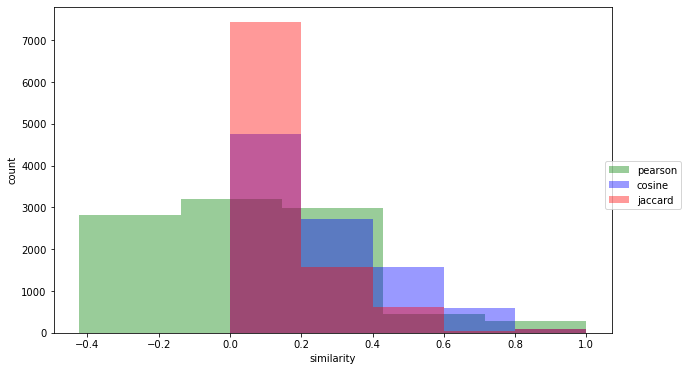

In [43]:
fig = plt.figure(figsize = (10, 6))
sns.distplot(df_sim['sim_pearson'], kde = False, bins = 5, color = 'green');
sns.distplot(df_sim['sim_cosine'], kde = False, bins = 5, color = 'blue');
sns.distplot(df_sim['sim_jaccard'], kde = False, bins = 5, color = 'red');
fig.legend(labels = ['pearson', 'cosine', 'jaccard'], loc = 'right')
plt.xlabel('similarity')
plt.ylabel('count');

While the distributions look somewhat different, and in the case of Pearson's correlation have a slightly different range, we can confirm that the results are still very close by looking at the pairwise correlations between the similarity metrics:

In [44]:
df_sim.filter(like = 'sim_').corr()

,sim_pearson,sim_jaccard
sim_pearson,1.000000,0.936645
sim_jaccard,0.936645,1.000000


So changing the similarity metric probably has a small effect, but as we saw filtering the data can have a much larger effect of what gets recommended. 

In the exercise above, we obtained similarity scores between `Toy Story (1995)` and all other movies, but what if we wanted to do this for all possible pairwise comparisons. FYI you can see from the code below how we can get the similarity matrix for cosine and Jaccard similarities, with slightly different implementations.

In [45]:
sim_mat = cosine_similarity(df_movies.drop(columns = ['movieId', 'title']))
print(sim_mat)

[[1.         0.77459667 0.31622777 ... 0.         0.31622777 0.4472136 ]

 [0.77459667 1.         0.         ... 0.         0.         0.        ]

 [0.31622777 0.         1.         ... 0.         0.         0.70710678]

 ...

 [0.         0.         0.         ... 1.         0.         0.        ]

 [0.31622777 0.         0.         ... 0.         1.         0.        ]

 [0.4472136  0.         0.70710678 ... 0.         0.         1.        ]]


In [46]:
from scipy.spatial.distance import pdist, squareform
sim_mat = squareform(pdist(df_movies.drop(columns = ['movieId', 'title']), metric = 'jaccard'))
print(sim_mat)

[[0.         0.4        0.83333333 ... 1.         0.83333333 0.8       ]

 [0.4        0.         1.         ... 1.         1.         1.        ]

 [0.83333333 1.         0.         ... 1.         1.         0.5       ]

 ...

 [1.         1.         1.         ... 0.         1.         1.        ]

 [0.83333333 1.         1.         ... 1.         0.         1.        ]

 [0.8        1.         0.5        ... 1.         1.         0.        ]]


In a production system, the above similarity scores are usually cached to avoid having to compute them on the fly every time.

# End of assignment